In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
from ficus import FigureManager
from IPython.display import FileLink
import glob
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
from grave import plot_network

In [3]:
import networkx as nx

In [8]:
meta = pd.read_csv('../sacPom.csv')

In [10]:
meta.tail()

,read_n,n_full,n_tips,n_islands,n_unknown,n_trivial,n_dnodes,n_unodes,n_tags,n_updates,n_unique,estimated_fp
20,4200,907,1341,3472,0,58,1081,5778,110146,318,8322366,0
21,4400,1140,1645,3563,0,59,1336,6407,131865,370,8719937,0
22,4600,1247,1928,3665,0,59,1501,6899,151851,394,9111504,0
23,4800,1352,2316,3741,0,60,1701,7470,176193,423,9551868,0
24,5000,1574,2740,3815,0,67,1994,8196,198549,491,9965479,0


In [12]:
G = nx.read_graphml('../fugu.cdbg.graphml')

ParseError: junk after document element: line 11449690, column 0 (<string>)

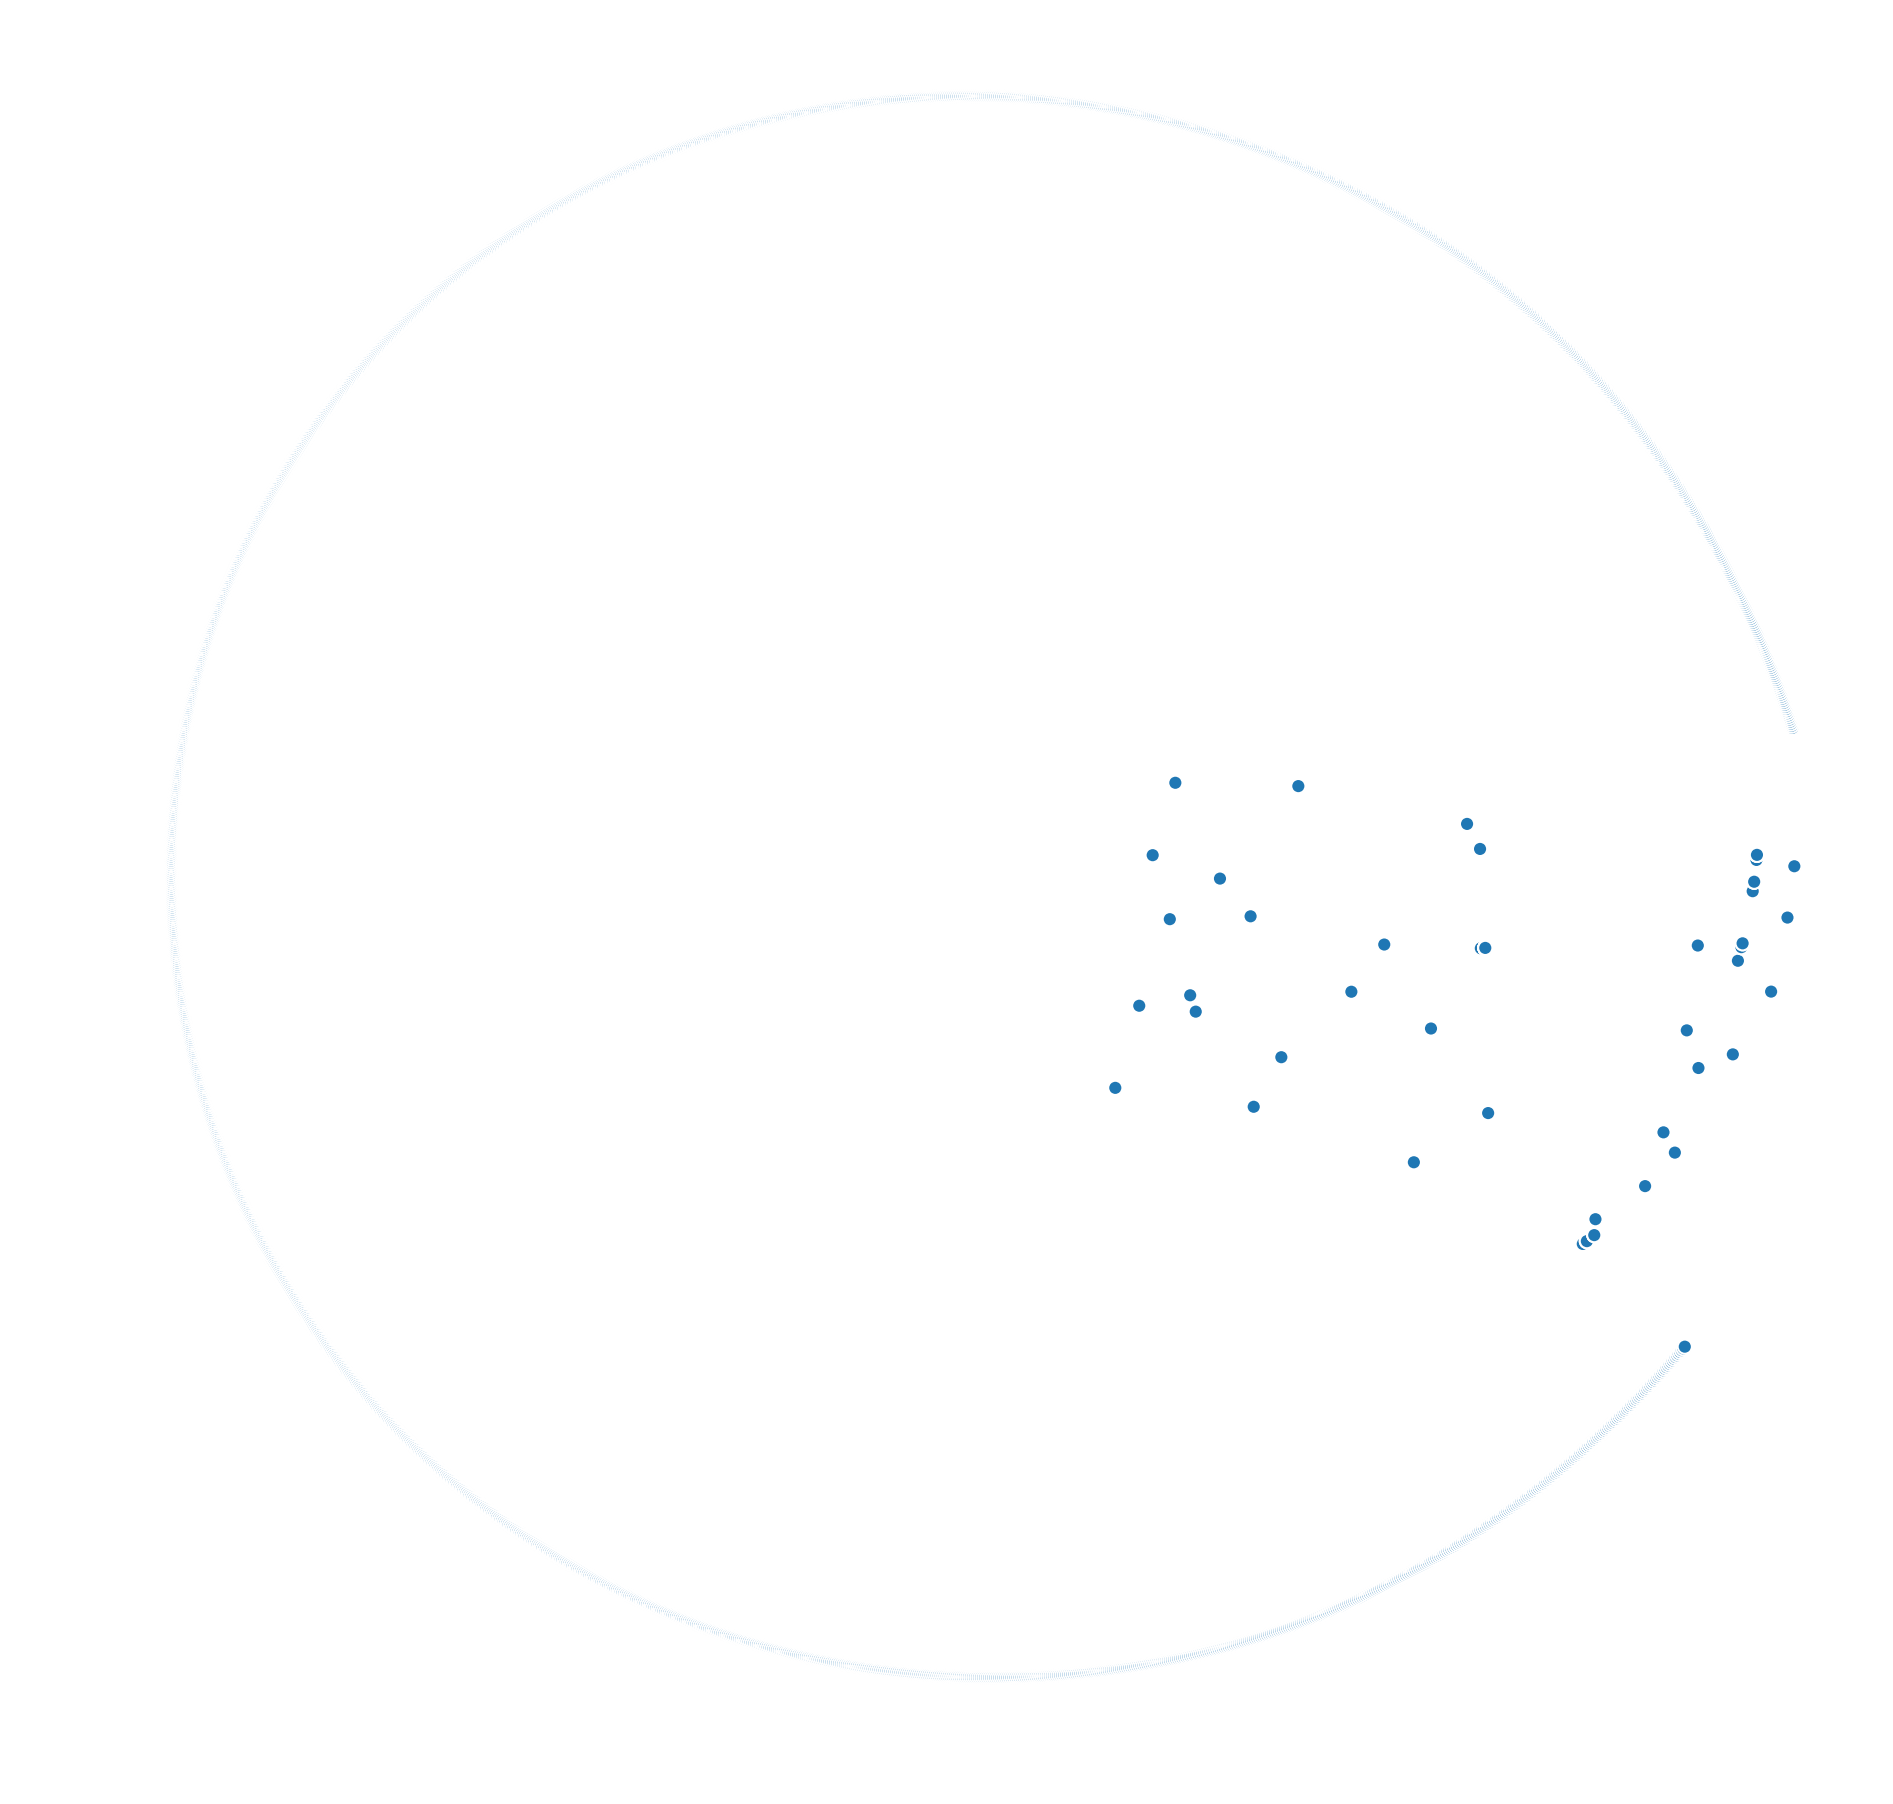

In [7]:
with FigureManager(show=True, figsize=(16,16)) as (fig, ax):
    plot_network(G, layout='kamada_kawai', ax=ax)

In [34]:
from boink.dbg import make_dBG
from khmer._oxli.parsing import FastxParser

In [36]:
graph = make_dBG(41, 2e9, 4, storage='_ByteStorage')

In [37]:
for record in FastxParser('sacPom/sacPom.cdbg.fasta.5138.FASTA'):
    graph.add_sequence(record.sequence)

In [59]:
sequences = dict()
for record in FastxParser('sacPom/sacPom.cdbg.fasta.5138.FASTA'):
    sequences[record.name] = record

In [41]:
graph.get_counts(sequences['ID=6823 L=391 type=FULL'])

[4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [73]:
counts = pd.read_csv('sacPom/sacPom.cdbg.fasta.5138.FASTA.tsv', na_values='None', delimiter='\t', quotechar='"')

In [27]:
bcalm = pd.read_csv('sacPom/bcalm-cdna/files.unitigs.fa.tsv', na_values='None', delimiter='\t', quotechar='"')

In [29]:
bcalm[bcalm['max'] > 1]

,name,max,median,start,end,internal_max


In [74]:
counts['L'] = counts.name.str.split(expand=True)[1].str.partition('=', expand=True)[2]
counts['type'] = counts.name.str.split(expand=True)[2].str.partition('=', expand=True)[2]
counts['ID'] = counts.name.str.split(expand=True)[0].str.partition('=', expand=True)[2]

In [75]:
bad = counts[counts['internal_max'] > 1]

In [76]:
bad

,name,max,median,start,end,internal_max,L,type,ID
114,ID=6827 L=132 type=FULL,4,2.0,4,4,2.0,132,FULL,6827
115,ID=6826 L=83 type=FULL,4,2.0,4,4,2.0,83,FULL,6826
117,ID=6824 L=391 type=FULL,4,2.0,4,4,2.0,391,FULL,6824
634,ID=6242 L=87 type=FULL,3,1.0,3,3,2.0,87,FULL,6242
1185,ID=5620 L=71 type=TIP,4,2.0,1,4,2.0,71,TIP,5620
1186,ID=5619 L=83 type=FULL,4,2.0,4,4,2.0,83,FULL,5619
1188,ID=5617 L=68 type=FULL,4,2.0,4,4,2.0,68,FULL,5617
1189,ID=5616 L=83 type=FULL,4,2.0,4,4,2.0,83,FULL,5616
1191,ID=5614 L=486 type=FULL,4,2.0,4,4,2.0,486,FULL,5614
1192,ID=5613 L=145 type=FULL,4,2.0,4,4,2.0,145,FULL,5613


In [60]:
S = sequences['ID=5173 L=106 type=FULL']

In [64]:
S

Sequence(name="ID=5173 L=106 type=FULL", sequence="CAGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTAAAACATTTGAAGGTTTTAGAAATCAATTGGACAAAGTTCAATTTATAAGGAAACTCATGTCAAA")

In [70]:
for kmer in list(S.kmers(41))[1:-1]:
    for seq in sequences.values():
        if kmer in seq.sequence:
            print(kmer, seq.name, seq, seq.sequence.find(kmer))
    break

AGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTA ID=5173 L=106 type=FULL CAGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTAAAACATTTGAAGGTTTTAGAAATCAATTGGACAAAGTTCAATTTATAAGGAAACTCATGTCAAA 1
AGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTA ID=631 L=4064 type=ISLAND GGAGAAAGAACTTTGGAAGGACTGTTATCCCTTTTGAAATCTCCCAAAGGGAAACATATACAATGTCCTACGCAAATTATCGTTATATGAAAGCAAGAGCAAAACGATGGAGACCAGAGAATTTGGATGGAATTCAAACATCAGACGAACATTTAATAAACCTTTTTGCAAAAATATTATCGAAGCATGTACCAGAGATAGGGAAATTCGATCCTAATAAGGATGTTGAAAGTTACATTTCAAAACTTGATCAACACTTTACTGAATACCCTTCATTATTCCCAAATGAGCATACTAAAAGACAGTATACATTGAATCACCTAGAAGAATTAGAGCAACAATTCGCTGAACGCATGTTTTCTGAGAATGGAAGTCTTACATGGCAAGAATTACTCAGACAAACAGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTAAAACATTTGAAGGTTTTAGAAATCAATTGGACAAAGTTCAATTTATAAGGAAACTCATGTCAAAAGCAAATGTTGATGATTTCCATACTCGCTTGTTTATATTATGGATGCTGCCATATTCCTTAAGGAAATTAAAGGAAAGAAATTACTGGAAATCAGAAATCAGTGAAATTTATGACTTTTTAGAGGACAAAAGAACAGCCTCGTATGGTAAAACTCACAAGCGTTTTCAACTGCAAAATAAAAATCTAGGAAAAGAGTCCCTTTCAAAGAAAAATAACACCACTAATAGCAGAAACCTGAGGAAGACAAA

In [72]:
'CAGGGAAAGTACAAGGATCCAACAAAGGTGATCGTTTAACTAAAACATTTGAAGGTTTTAGAAATCAATTGGACAAAGTTCAATTTATAAGGAAACTCATGTCAAA' in sequences['ID=631 L=4064 type=ISLAND'].sequence

True